# Neural & Behavioral Modeling - Week 2 (Exercises)
by 李彥廷 (b08207008@ntu.edu.tw)

In [1]:
%config IPCompleter.greedy=True 
%matplotlib inline
from numpy import *
from matplotlib.pyplot import *
from IPython.display import *

## 1 Nonlinear love triangle (5 points)

Please use Euler integration with a small step size (say dt=0.01) and the suggested parameters (a,b,c,d,e,f)=(-3,4,-7,2,2,-1) to simulate Eq.(5) in the following paper:

Sprott, J. C. (2004). Dynamical models of love. Nonlinear dynamics, psychology, and life sciences, 8(3), 303-314.

### 1.1  Coding the simulation (3 points)

Please use differnt colors/shapes to put Rj(t), J, Rg(t), & G(t) curves in the same plot.

In [196]:
# Write your codes here
def Triangle(Rj, j, Rg, g):
    dt=0.001
    t=arange(0,25,dt)
    (a,b,c,d,e,f)=(-3, 4, -7, 2, 2, -1)
    R_J, J, R_G, G = [Rj], [j], [Rg], [g]
    for i in t:
        R_J1, J1, R_G1, G1 = R_J[-1], J[-1], R_G[-1], G[-1]
        R_J2 = R_J1 + dt* (a*R_J1 + b*(J1-G1)*(1-abs(J1-G1)))
        J2 = J1 + dt * (c*R_J1*(1-abs(R_J1)) + d*J1)
        R_G2 = R_G1 + dt* (a*R_G1 + b*(G1-J1)*(1-abs(G1-J1)))
        G2 = G1 + dt * (e*R_G1*(1-abs(R_G1)) + f*G1)

        R_J.append(R_J2)
        J.append(J2)
        R_G.append(R_G2)
        G.append(G2)

    figure(figsize=(9,6))
    plot(t, R_J[0:-1], 'bv')
    plot(t, J[0:-1], 'g.')
    plot(t, R_G[0:-1], 'rv')
    plot(t, G[0:-1], 'y.')
    legend(['$R_J$','$J$','$R_G$','G'] )

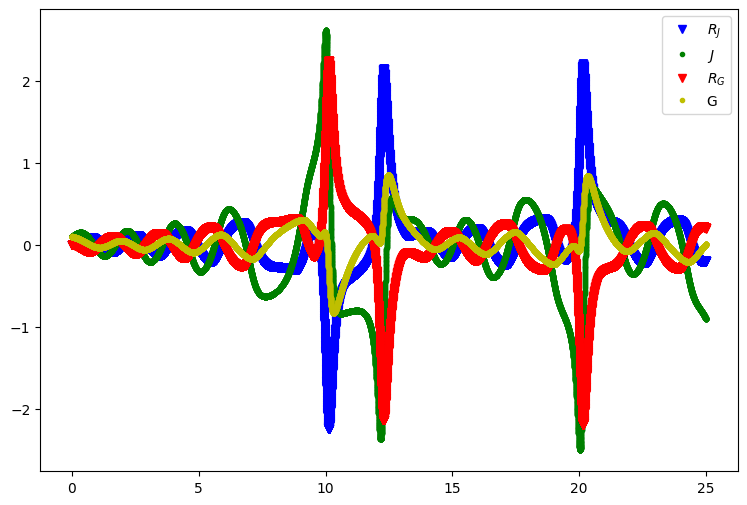

In [197]:
Triangle(0,0.1,0,0.1)

### 1.2 Studying chaos (2 points)

Please provide two sets of initial values of (Rj, J, Rg, & G) that can produce distinct model behaviors.

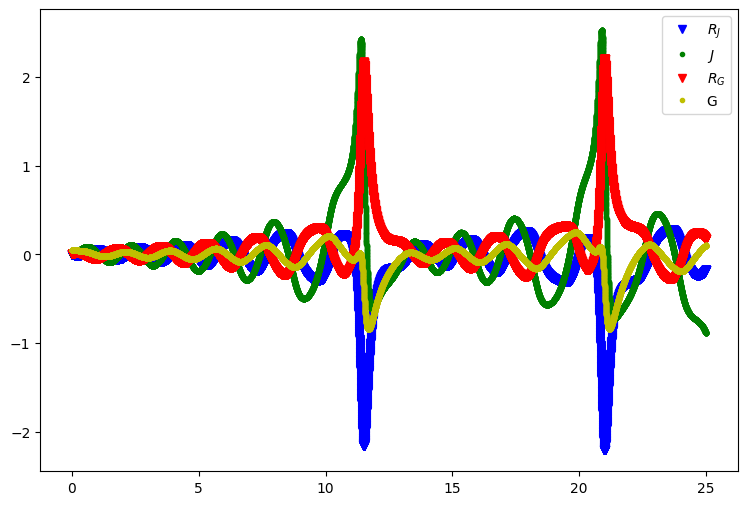

In [231]:
# Run your simulation with the 1st set of initial values here
Triangle(0,0.01,0,0.05)

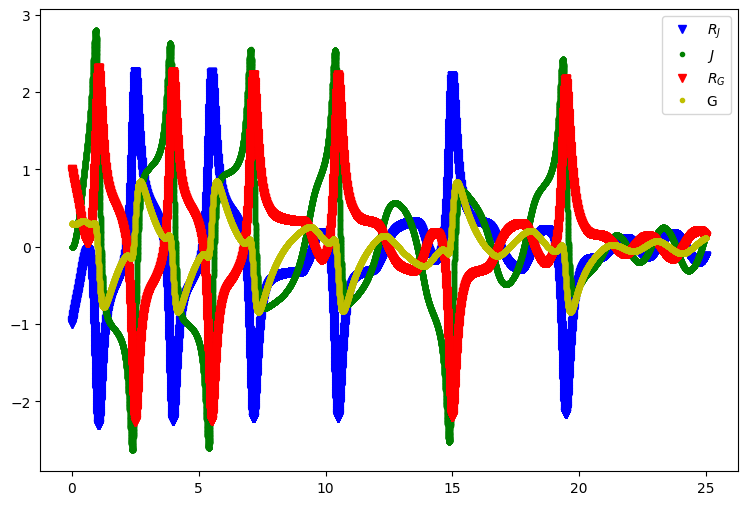

In [221]:
# Run your simulation with the 2nd set of initial values here
Triangle(-1, -0.01, 1, 0.3)

## 2 Fix the simulation of "Growth and underinvestment" (5 points)

Although the simulation and explanation of "underinvested growth" seem reasonable, the simulation doesn't appear to describe "sufficiently invested growth" where the performance varialbe should be able to increase over time. Please do whatever you can to have a model that can simulate both phenomena. 

23.041160665065945


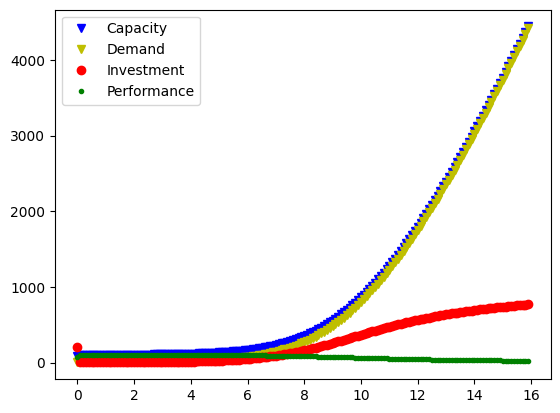

In [542]:
performance_standard=100 # Model parameter
Capacity,Demand=[80],[1] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,16,dt) # integration period
perf,inves=[],[]
for i in t:
    Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
    performance=Capacity1-Demand1 # net gains
    perf.append(performance)
    growing_action=0.01*Demand1 # more demands -> grow the company
    investment=10*(performance_standard-performance) # put in money if performance not reaching the standard
    inves.append(investment)
    Capacity2=Capacity1+dt*investment # Euler integration: put in money to increase capacity
    Demand2=Demand1+dt*0.75*growing_action*performance # Euler integration to reach equilibrium: capacity=demand
    Capacity.append(Capacity2)
    Demand.append(Demand2)
    
plot(t,Capacity[0:-1],'bv')
plot(t,Demand[0:-1], 'yv')
plot(t,inves,'ro')
plot(t,perf,'g.')
legend(['Capacity','Demand','Investment','Performance']);
print(perf[-1]) # The final performance

C for Capacity, D for demand, P for Performance, I for investiment, S for standard.
\begin{align*}
\frac{dC}{dt} &= I = 10(S-P) = 10(S - (C-D))\\
\frac{dD}{dt} &= 0.75 \times 0.01D \times P = 0.75 \times 0.01D \times (C-D)\\
\frac{dP}{dt} &= 10(S-(C-D)) - 0.0075D(C-D)\\
&= 10S-(10+0.0075D)(C-D)\\
&= 10S-(10+0.0075D)P
\end{align*}


Let S = 100 and P = 100, $\frac{dP}{dt}$ will always be less than 0 becase Demand is always greater than 0.  
We should let investment depends on the performance instead of the discrepancy between the performance and the standard.
So, I define the investiment to be 0.2*performance. 
\begin{align*}
\frac{dC}{dt} &= I = 0.2P = 0.2(C-D)\\
\frac{dD}{dt} &= 0.75 \times 0.01D \times P = 0.75 \times 0.01D \times (C-D)\\
\frac{dP}{dt} &= 0.2(C-D) - 0.0075D(C-D)\\
&= (0.2 - 0.0075D)P
\end{align*}
The following figure shows the current modification.

1.1163962199134403e-08


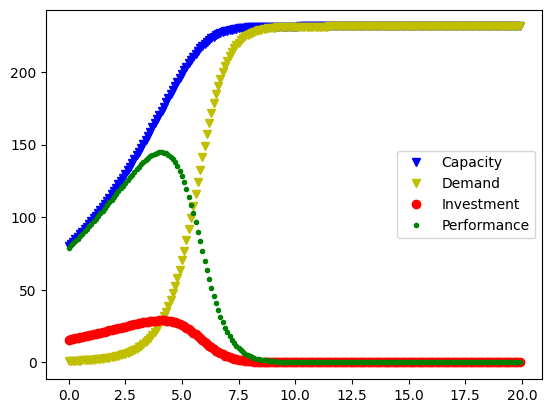

In [571]:
performance_standard=100 # Model parameter
Capacity,Demand=[80],[1] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,20,dt) # integration period
perf,inves=[],[]
for i in t:
    Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
    performance=Capacity1-Demand1 # net gains
    perf.append(performance)
    growing_action=0.01*Demand1 # more demands -> grow the company
    investment=(0.2*performance) # put in money if performance not reaching the standard
    inves.append(investment)
    Capacity2=Capacity1+dt*investment # Euler integration: put in money to increase capacity
    Demand2=Demand1+dt*0.75*growing_action*performance# Euler integration to reach equilibrium: capacity=demand
    Capacity.append(Capacity2)
    Demand.append(Demand2)
    
plot(t,Capacity[0:-1],'bv')
plot(t,Demand[0:-1], 'yv')
plot(t,inves,'ro')
plot(t,perf,'g.')
legend(['Capacity','Demand','Investment','Performance']);
print(perf[-1]) # The final performance

In the figure above we can see that the demand were growing too fast such that the performance were getter worse and the capacity won't increase due to the decreasing investiment.  I then modify the increasing rate of the demand so that it will not reach to capacity too fast. I let growing_action be $0.01*D^{1/3}$ and now when we manipulate the ratio of performance and investment, we can model the sufficient investiment.

1101.8030531359875


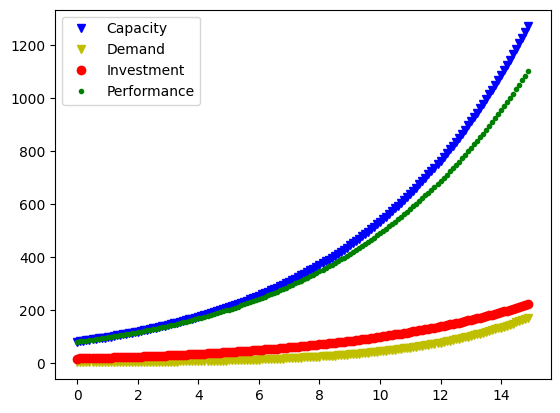

In [655]:
performance_standard=100 # Model parameter
Capacity,Demand=[80],[1] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,15,dt) # integration period
maxC = 5000
maxD = 4000
perf,inves=[],[]
for i in t:
    Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
    performance=Capacity1-Demand1 # net gains
    perf.append(performance)
    growing_action=0.01*Demand1**(1/3) # more demands -> grow the company
    investment=(0.2*performance) 
    inves.append(investment)
    Capacity2=Capacity1+dt*investment # Euler integration: put in money to increase capacity
    Demand2=Demand1+dt*0.75*growing_action*performance# Euler integration to reach equilibrium: capacity=demand
    Capacity.append(Capacity2)
    Demand.append(Demand2)
    
plot(t,Capacity[0:-1],'bv')
plot(t,Demand[0:-1], 'yv')
plot(t,inves,'ro')
plot(t,perf,'g.')
legend(['Capacity','Demand','Investment','Performance']);
print(perf[-1]) # The final performance

In the long run, Demand will meet Capacity and reach a equilibrium. At this time, the performance will decrease and no investiments.

7162.45743095455


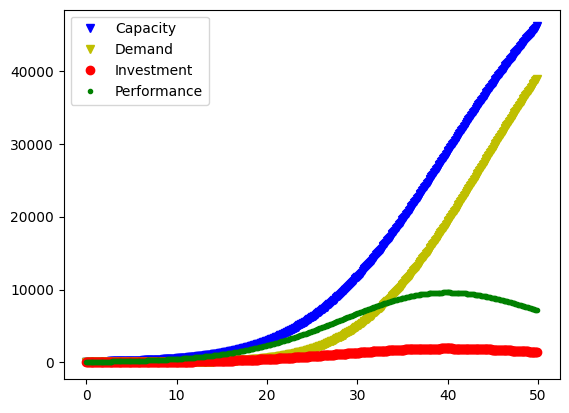

In [663]:
performance_standard=100 # Model parameter
Capacity,Demand=[80],[1] # Initial values
dt=.1 # step size for numerical integration
t=arange(0,50,dt) # integration period
maxC = 5000
maxD = 4000
perf,inves=[],[]
for i in t:
    Capacity1,Demand1=Capacity[-1],Demand[-1] # the last element
    performance=Capacity1-Demand1 # net gains
    perf.append(performance)
    growing_action=0.01*Demand1**(1/3) # more demands -> grow the company
    investment=(0.2*performance) 
    inves.append(investment)
    Capacity2=Capacity1+dt*investment # Euler integration: put in money to increase capacity
    Demand2=Demand1+dt*0.75*growing_action*performance# Euler integration to reach equilibrium: capacity=demand
    Capacity.append(Capacity2)
    Demand.append(Demand2)
    
plot(t,Capacity[0:-1],'bv')
plot(t,Demand[0:-1], 'yv')
plot(t,inves,'ro')
plot(t,perf,'g.')
legend(['Capacity','Demand','Investment','Performance']);
print(perf[-1]) # The final performance